# [Huggins pitch](https://en.wikipedia.org/wiki/Dichotic_pitch)



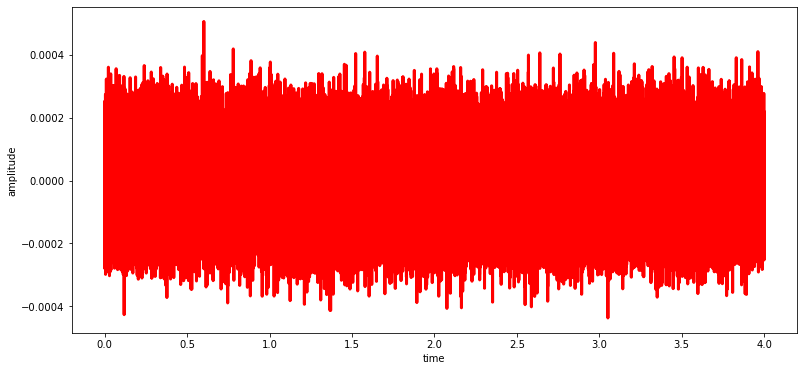

In [57]:


import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import IPython.display as ipd   
    
Tdur = 4 # noise duration (seconds)
fs = 44100 # sample rate (Hz)
dt = 1/fs  # time step
tx = np.arange(0,Tdur,dt)  # time axis
freq = 0.5e3 # frequency of the huggins pitch

c = 0.03  #constant used in pole radius calculation
r = 1 - ((c*np.pi*freq)/fs)  #Radius of poles from the origin
b = [(r**2), -2*r*np.cos(2*np.pi*freq/fs), 1] #zeros of all pass filter
a = np.flipud(b); # poles are symmetric with corresponding zeros around the unit circle
nsamp = np.round(fs*Tdur)
#OP = np.zeros((np.round(fs*Tdur),2))
amp = 0.01 # amplitude of the nois
noise = amp*np.random.normal(0,1,nsamp)

fnoise = signal.lfilter(b, a, noise)
hpitch = [noise, noise]

ipd.display(ipd.Audio(hpitch, rate=fs))


fig, ax = plt.subplots(figsize=(13, 6))
ax.set_xlabel('time')
ax.set_ylabel('amplitude')
     
ax.plot(tx, amp*noise, lw=3, c='r')


       
